In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans

In [2]:
musiclist = pd.read_csv(r'/Users/simgesargin/Desktop/Bootcamp/df_audio_features_5000')
musiclist.head(3)

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html
0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,0.658,0.259,11,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376,,256213,4,1n7JnwviZ7zf0LR1tcGFq7,https://open.spotify.com/track/1n7JnwviZ7zf0LR...
1,Saudade De Bahia ...,Antônio Carlos Jobim,0.742,0.399,2,-12.646,1,0.0346,0.217,0.000002,0.107,0.693,125.039,,191867,4,5QGM1U0eCYrQuwSJwTm5Zq,https://open.spotify.com/track/5QGM1U0eCYrQuwS...
2,"Canta Canta, Minha Gente ...",Martinho Da Vila,0.851,0.730,2,-11.048,1,0.3470,0.453,0.000063,0.124,0.905,93.698,,152267,4,0NLIFSZxPzQhCwnkn5PJYs,https://open.spotify.com/track/0NLIFSZxPzQhCwn...


In [3]:
# Check column names in the musiclist DataFrame
print(musiclist.columns)

Index(['name                                                                                                                                                                             ',
       'artist                                          ', 'danceability ',
       'energy   ', 'key ', 'loudness ', 'mode ', 'speechiness ',
       'acousticness ', 'instrumentalness ', 'liveness ', 'valence ',
       'tempo   ', 'type ', 'duration_ms ', 'time_signature ',
       'id                     ', 'html'],
      dtype='object')


In [4]:
#Since there were whitespaces in the column names, I used str.strip() to update the column names and remove whitespaces.
musiclist.columns = musiclist.columns.str.strip()


In [5]:
musiclist_id = (
    musiclist
    .assign(
        name_artist_id=lambda x: x['name'] + ' - ' + x['artist'] + ' - '
    )
    .set_index('name_artist_id')
    .filter([
        'danceability', 'energy','loudness', 'mode', 'speechiness',
        'acousticness', 'instrumentalness', 'liveness', 'valence', 
        'tempo', 'type', 'duration_ms', 'time_signature','id'
    ])
)
musiclist_id.shape

(5235, 14)

In [6]:
musiclist_id[:3]

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id
name_artist_id,,,,,,,,,,,,,,
Se Eu Quiser Falar Com Deus - Gilberto Gil -,0.658,0.259,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376,,256213,4,1n7JnwviZ7zf0LR1tcGFq7
Saudade De Bahia - Antônio Carlos Jobim -,0.742,0.399,-12.646,1,0.0346,0.217,0.000002,0.107,0.693,125.039,,191867,4,5QGM1U0eCYrQuwSJwTm5Zq
"Canta Canta, Minha Gente - Martinho Da Vila -",0.851,0.730,-11.048,1,0.3470,0.453,0.000063,0.124,0.905,93.698,,152267,4,0NLIFSZxPzQhCwnkn5PJYs


Text(0, 0.5, 'instrumentalness')

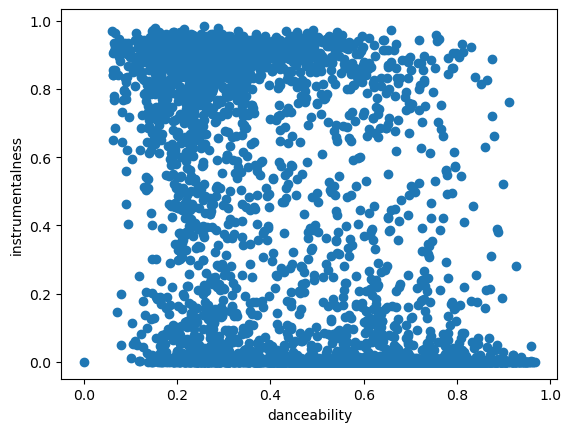

In [7]:
#Doesn't seem anything related
plt.scatter(musiclist['danceability'], musiclist['instrumentalness'])
plt.xlabel('danceability')
plt.ylabel('instrumentalness') 

In [8]:
musiclist_id_columns = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
musiclist_fit = musiclist_id[musiclist_id_columns]
musiclist_fit.head()                                 

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
name_artist_id,,,,,,,,,
Se Eu Quiser Falar Com Deus - Gilberto Gil -,0.658,0.2590,-13.141,0.0705,0.694,0.000059,0.975,0.306,110.376
Saudade De Bahia - Antônio Carlos Jobim -,0.742,0.3990,-12.646,0.0346,0.217,0.000002,0.107,0.693,125.039
"Canta Canta, Minha Gente - Martinho Da Vila -",0.851,0.7300,-11.048,0.3470,0.453,0.000063,0.124,0.905,93.698
Mulher Eu Sei - Chico César -,0.705,0.0502,-18.115,0.0471,0.879,0.000041,0.386,0.524,106.802
Rosa Morena - Kurt Elling -,0.651,0.1190,-19.807,0.0380,0.916,0.000343,0.104,0.402,120.941


In [9]:
#Data scaling and normalizing the data
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
features_normal = scaler.fit_transform(musiclist_fit)
features_normal_df = pd.DataFrame(features_normal, columns=musiclist_fit.columns)
features_normal_df.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.680455,0.2590,0.763897,0.076797,0.696787,0.000060,0.987842,0.310660,0.515800
1,0.767322,0.3990,0.771967,0.037691,0.217871,0.000002,0.108409,0.703553,0.584322
2,0.880041,0.7300,0.798018,0.377996,0.454819,0.000064,0.125633,0.918782,0.437862
3,0.729059,0.0502,0.682811,0.051307,0.882530,0.000041,0.391084,0.531980,0.499098
4,0.673216,0.1190,0.655228,0.041394,0.919679,0.000348,0.105370,0.408122,0.565171


In [10]:
#if its close to +1 positive correlation, and -1 negative correlation. 1e ve -1e ne kadar yakınsa o kadar iyi.
#energy and acoustic negative correlation
corralated = pd.DataFrame(features_normal, columns = musiclist_fit.columns).corr()
corralated

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
danceability,1.000000,0.040491,0.358328,0.036121,-0.111151,-0.573800,-0.032534,0.680097,-0.009585
energy,0.040491,1.000000,0.786860,0.303940,-0.850469,-0.169923,0.170642,0.159101,0.211617
loudness,0.358328,0.786860,1.000000,0.233609,-0.697709,-0.471786,0.134788,0.335754,0.213228
speechiness,0.036121,0.303940,0.233609,1.000000,-0.265754,-0.064754,0.081963,-0.011395,0.064255
acousticness,-0.111151,-0.850469,-0.697709,-0.265754,1.000000,0.194941,-0.103144,-0.130646,-0.187994
instrumentalness,-0.573800,-0.169923,-0.471786,-0.064754,0.194941,1.000000,-0.051664,-0.500584,-0.071945
liveness,-0.032534,0.170642,0.134788,0.081963,-0.103144,-0.051664,1.000000,0.007272,0.036370
valence,0.680097,0.159101,0.335754,-0.011395,-0.130646,-0.500584,0.007272,1.000000,0.098783
tempo,-0.009585,0.211617,0.213228,0.064255,-0.187994,-0.071945,0.036370,0.098783,1.000000


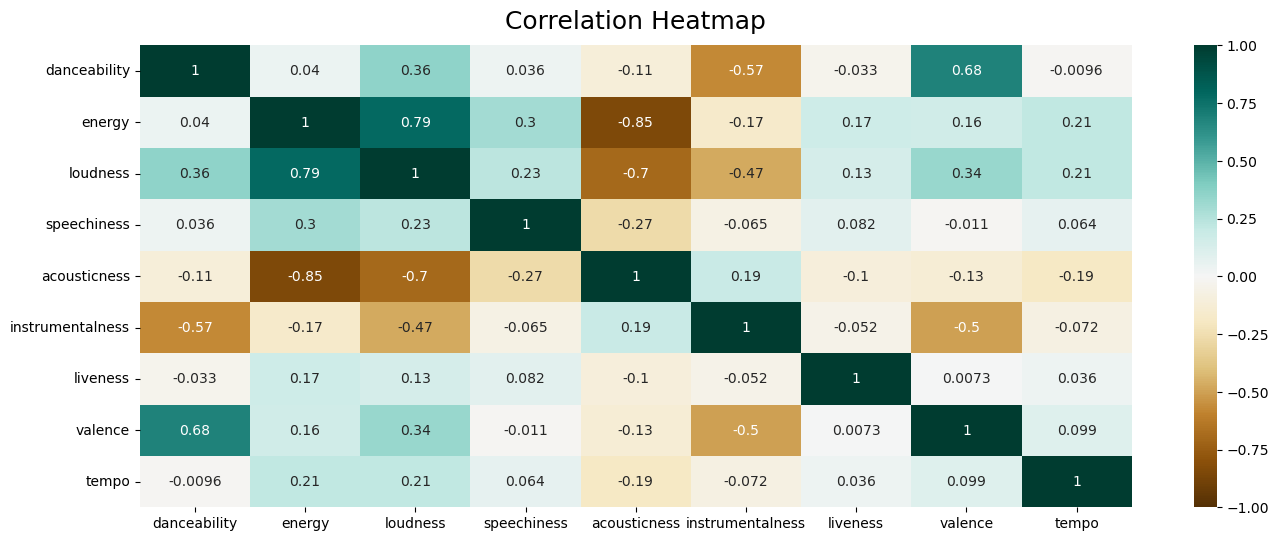

In [11]:
features_normal_df = pd.DataFrame(features_normal, columns=musiclist_fit.columns)

plt.figure(figsize=(16,6))
heatmap = sns.heatmap(features_normal_df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

In [12]:
#How many cluster should we get? 
from sklearn.cluster import KMeans

elbow = []

for i in range(3, 20):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(features_normal)
    elbow.append(kmeans.inertia_)

elbow

[1251.3038074247952,
 998.9301029220189,
 812.9955490378974,
 747.4216757893773,
 698.0646206107995,
 664.1294602744708,
 631.7552559290642,
 608.3626908043042,
 587.1128432998185,
 567.4278325676753,
 549.9237882448715,
 535.2267442138618,
 520.837272605355,
 508.44972857491695,
 498.8266793738776,
 488.03342212654326,
 477.3356731166722]

Text(0, 0.5, 'Elbow')

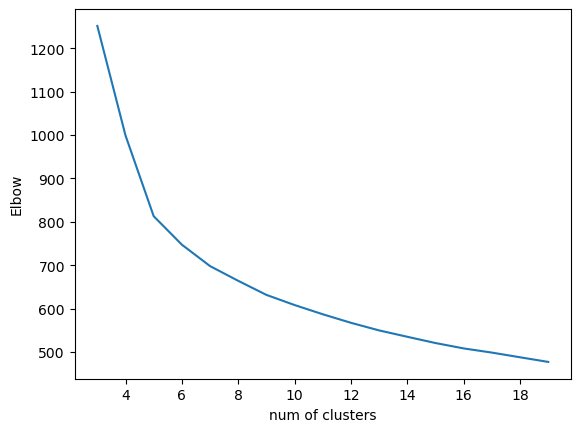

In [13]:
#The place that we see the curve is 7, sum of squares are stabil so I say 7. 
plt.plot(range(3,20),elbow)
plt.xlabel('num of clusters')
plt.ylabel('Elbow')

In [71]:
#I normalized clustered data and added it as a new column 
kmeans_new = KMeans(n_clusters=8)
kmeans_new.fit(features_normal)
clusters = musiclist_id.copy()
features_normal_df['cluster_pred'] = kmeans_new.fit_predict(features_normal)
clusters['cluster_pred'] = kmeans_new.fit_predict(features_normal)

In [62]:
clusters.head(2)

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,cluster_pred
name_artist_id,,,,,,,,,,,,,,,
Se Eu Quiser Falar Com Deus - Gilberto Gil -,0.658,0.259,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376,,256213,4,1n7JnwviZ7zf0LR1tcGFq7,6
Saudade De Bahia - Antônio Carlos Jobim -,0.742,0.399,-12.646,1,0.0346,0.217,0.000002,0.107,0.693,125.039,,191867,4,5QGM1U0eCYrQuwSJwTm5Zq,3


In [15]:
#How to take example is important
#Do I have outliers?
#What kind of songs do we have 

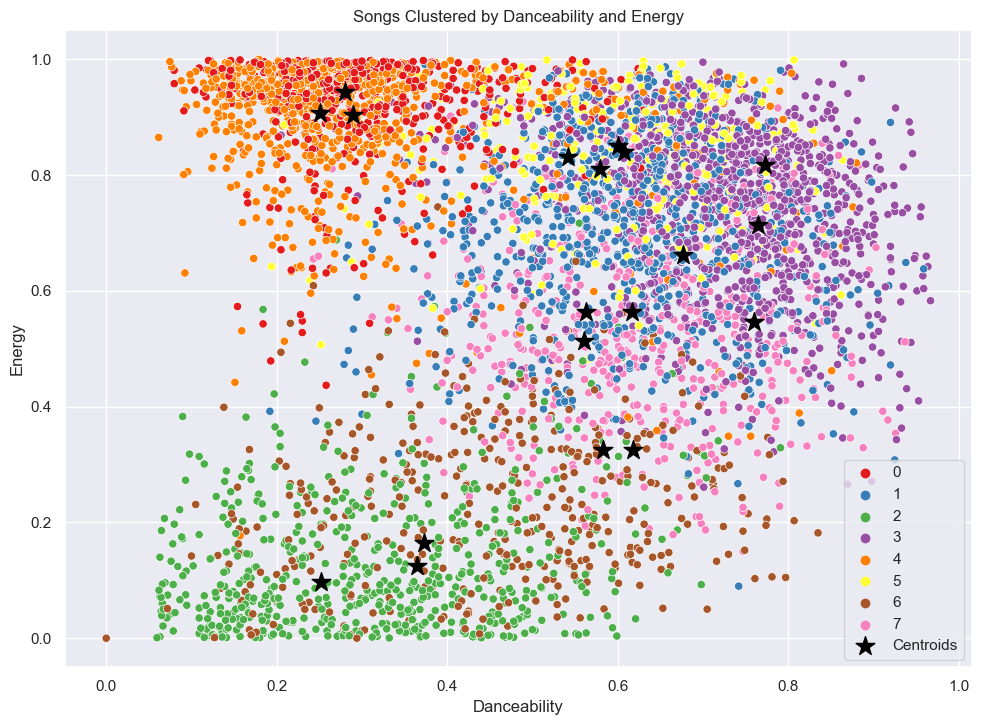

In [63]:
import seaborn as sns

colors = sns.color_palette('Set1', n_colors=8)
sns.scatterplot(x='danceability', y='energy', hue='cluster_pred', palette=colors, data=clusters)
# Plot the cluster centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, color='black', label='Centroids')

# Add plot elements
plt.title('Songs Clustered by Danceability and Energy')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.legend()
plt.show()

In [64]:
# Define the number of clusters
num_clusters = 8
import numpy as np
# Define a function to get the distances from each point to its centroid
def get_distances_to_centroid(df, centroids):
    distances = []
    for i, row in df.iterrows():
        point = np.array(list(row[features_normal_df]))
        centroid_distances = []
        for centroid in centroids:
            centroid_distances.append(np.linalg.norm(point - centroid))
        distances.append(min(centroid_distances))
    return distances

In [67]:
# Get the indices of the most representative songs for each cluster
import numpy as np
representative_song_indices = []
for i in range(num_clusters):
    cluster_df = clusters[clusters['cluster_pred'] == i]
    distances = get_distances_to_centroid(cluster_df, centroids)
    sorted_indices = np.argsort(distances)
    top_indices = sorted_indices[:min(25, len(sorted_indices))]
    representative_song_indices.extend(cluster_df.iloc[top_indices].index)

# Get the most representative songs DataFrame
representative_songs = clusters.loc[representative_song_indices].reset_index(drop=True)


TypeError: Indexing a Series with DataFrame is not supported, use the appropriate DataFrame column

In [16]:
#See clusters between 0-6
features_normal_df.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster_pred
0,0.680455,0.2590,0.763897,0.076797,0.696787,0.000060,0.987842,0.310660,0.515800,6
1,0.767322,0.3990,0.771967,0.037691,0.217871,0.000002,0.108409,0.703553,0.584322,2
2,0.880041,0.7300,0.798018,0.377996,0.454819,0.000064,0.125633,0.918782,0.437862,2
3,0.729059,0.0502,0.682811,0.051307,0.882530,0.000041,0.391084,0.531980,0.499098,6
4,0.673216,0.1190,0.655228,0.041394,0.919679,0.000348,0.105370,0.408122,0.565171,6


In [17]:
clusters.head(2)

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,cluster_pred
name_artist_id,,,,,,,,,,,,,,,
Se Eu Quiser Falar Com Deus - Gilberto Gil -,0.658,0.259,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376,,256213,4,1n7JnwviZ7zf0LR1tcGFq7,6
Saudade De Bahia - Antônio Carlos Jobim -,0.742,0.399,-12.646,1,0.0346,0.217,0.000002,0.107,0.693,125.039,,191867,4,5QGM1U0eCYrQuwSJwTm5Zq,3


<AxesSubplot:xlabel='variable', ylabel='value'>

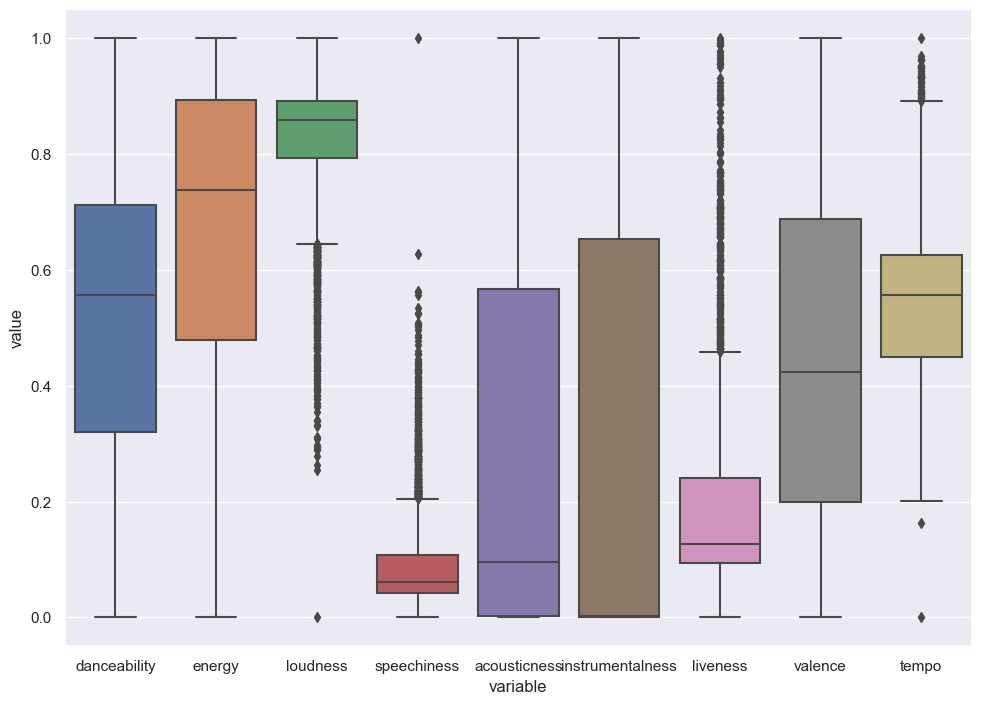

In [18]:
#check the values
#explore kmeans results
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(11.7,8.27)})
features_normal_new=features_normal_df.drop('cluster_pred',axis=1)
sns.boxplot(x='variable', y='value', data=pd.melt(features_normal_new))

In [20]:
#the average value that each cluster has for each one of the features
#features_normal_df.groupby(by=cluster_pred).mean()

In [ ]:
#From API of spotify
#Check some singers and learn which cluster it goes
#All the playlists you can fetch informations about the type of the songs 
#How to create a new playlist is in the creating playlist section of Joan's code 
#If you get information about the songs you can experiment with your own songs regarding their audio features
#If you have a dataset with roughly 5000 songs, that means that you should explore having between 20 and 100 clusters.

In [21]:
from sklearn.metrics import silhouette_score
silhouette_score(features_normal, kmeans.labels_)

0.17790166314181077

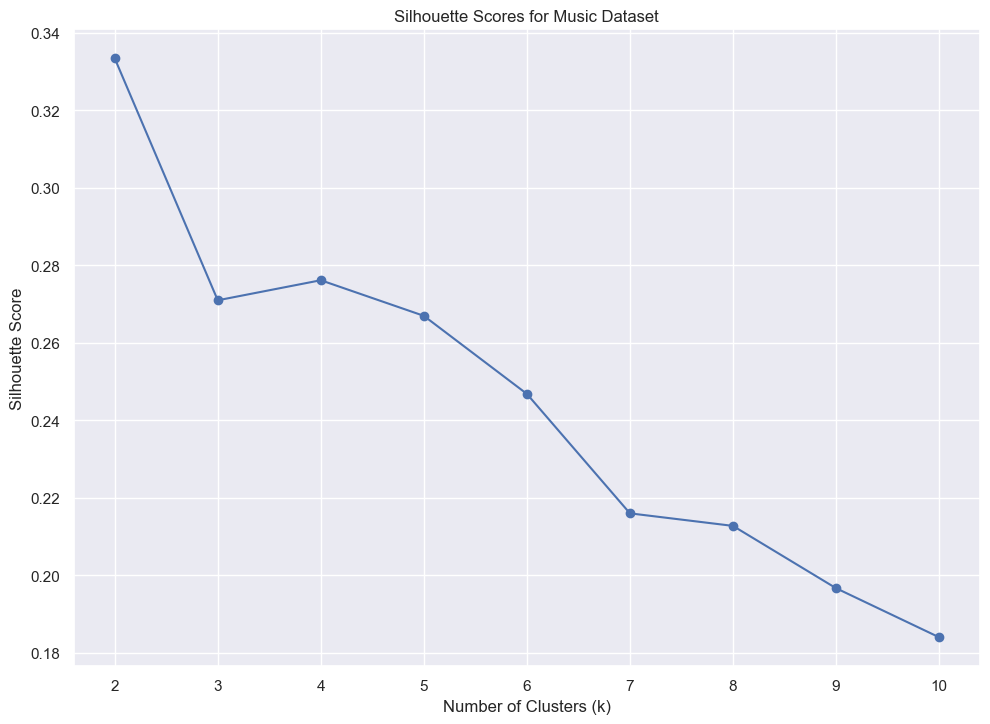

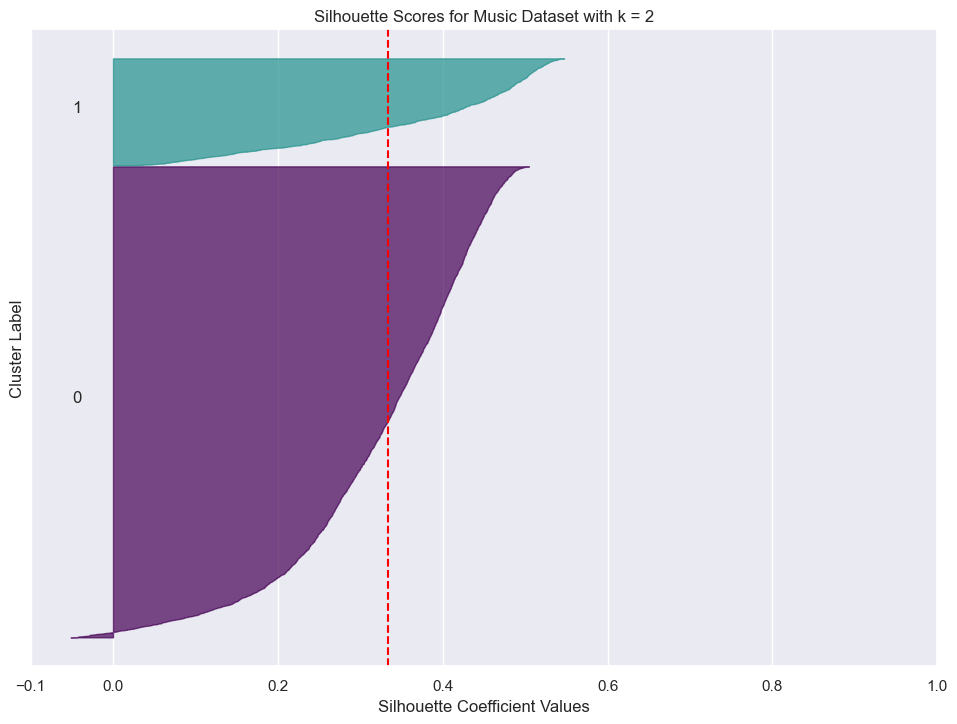

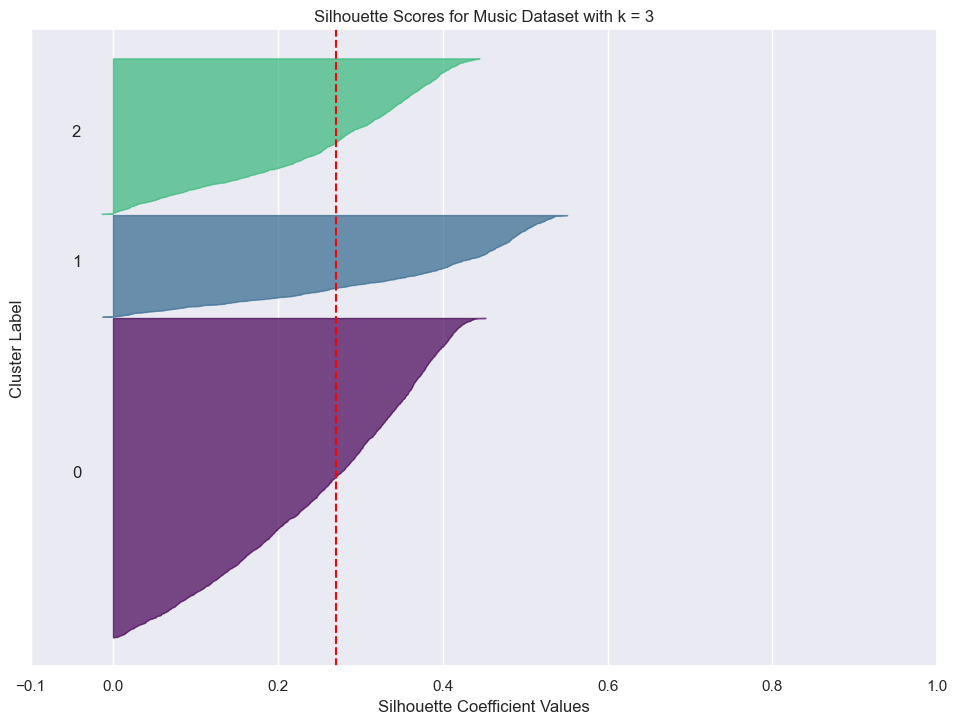

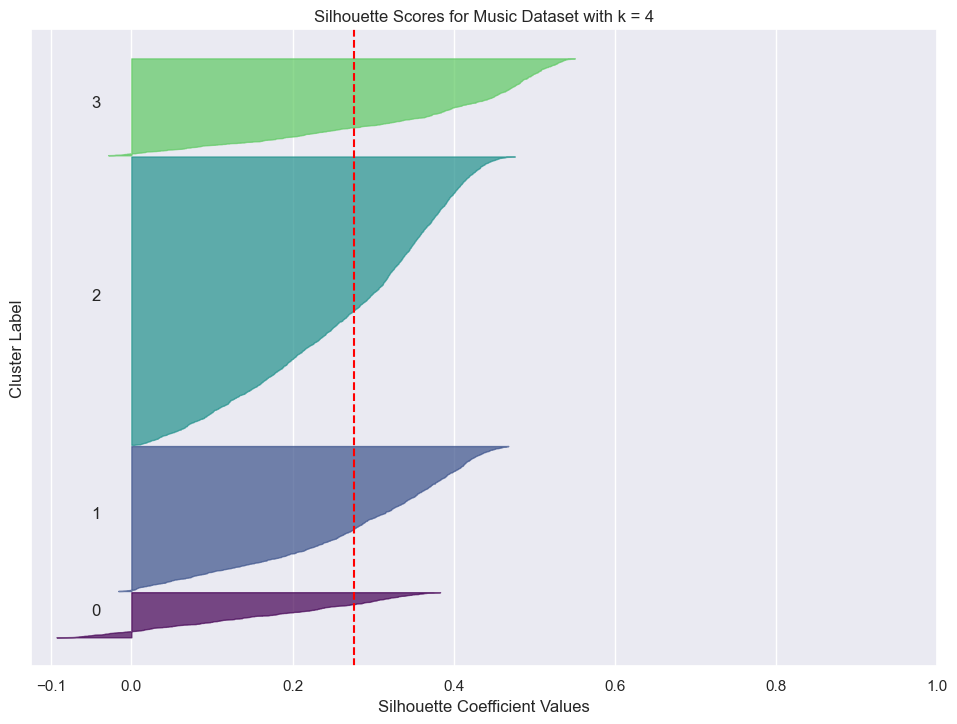

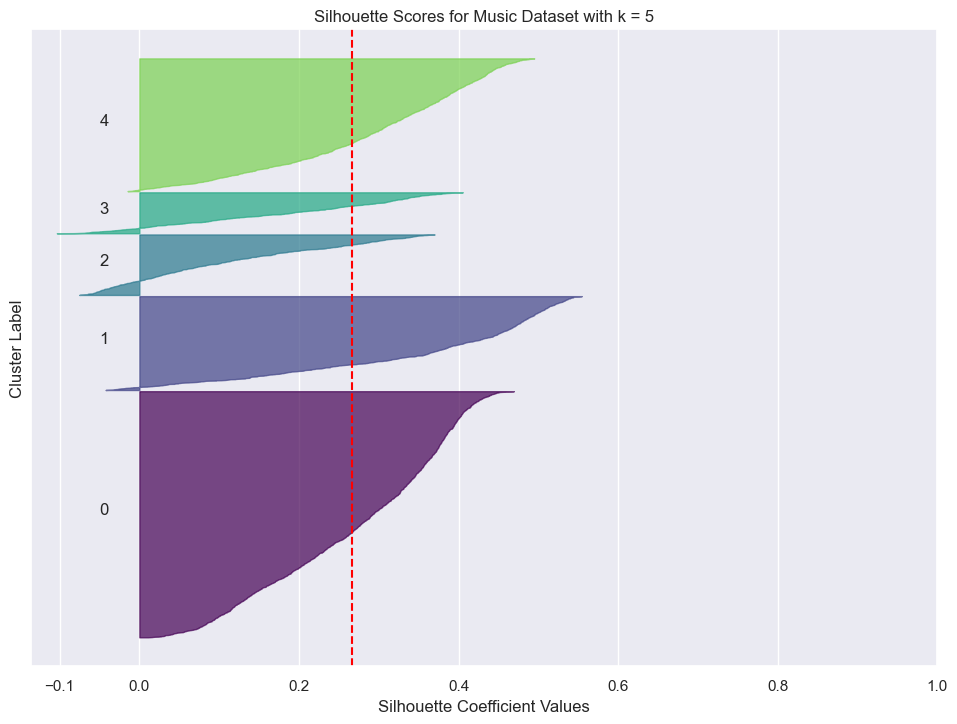

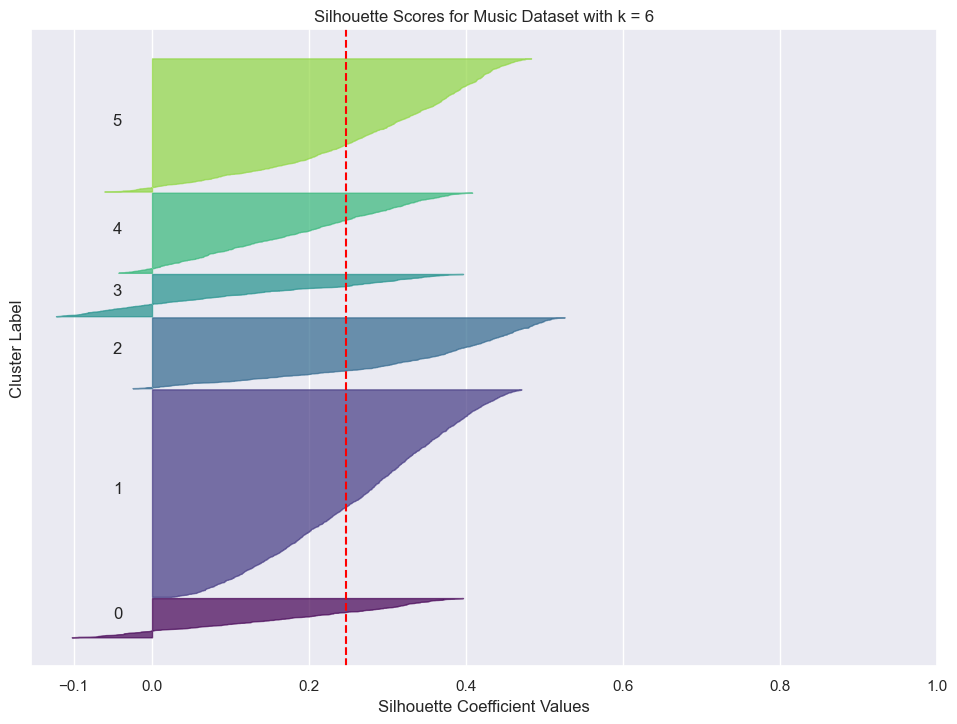

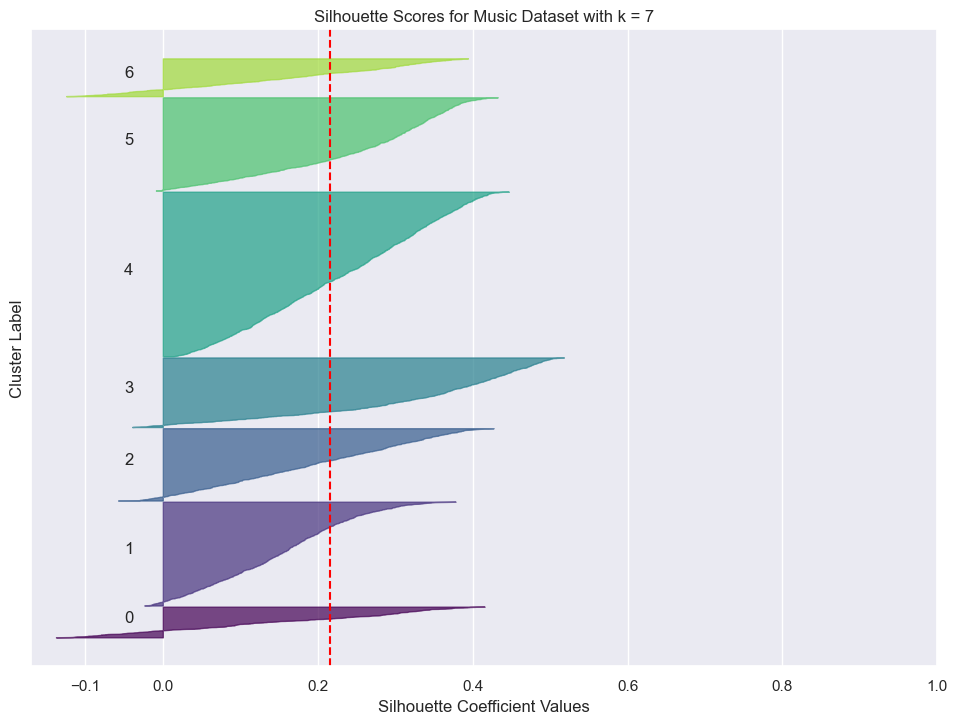

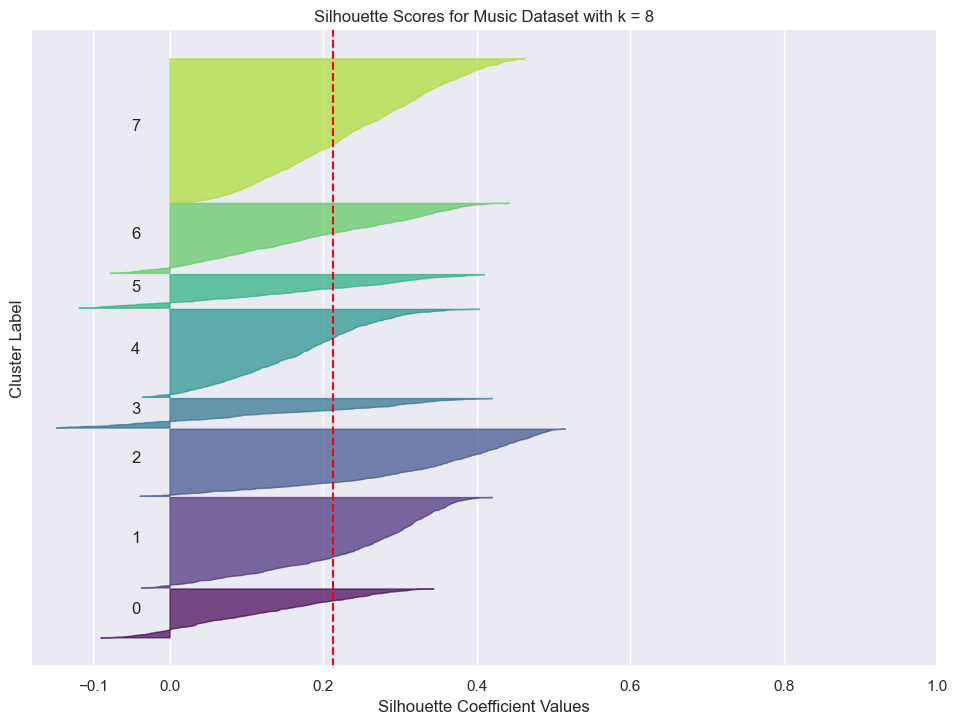

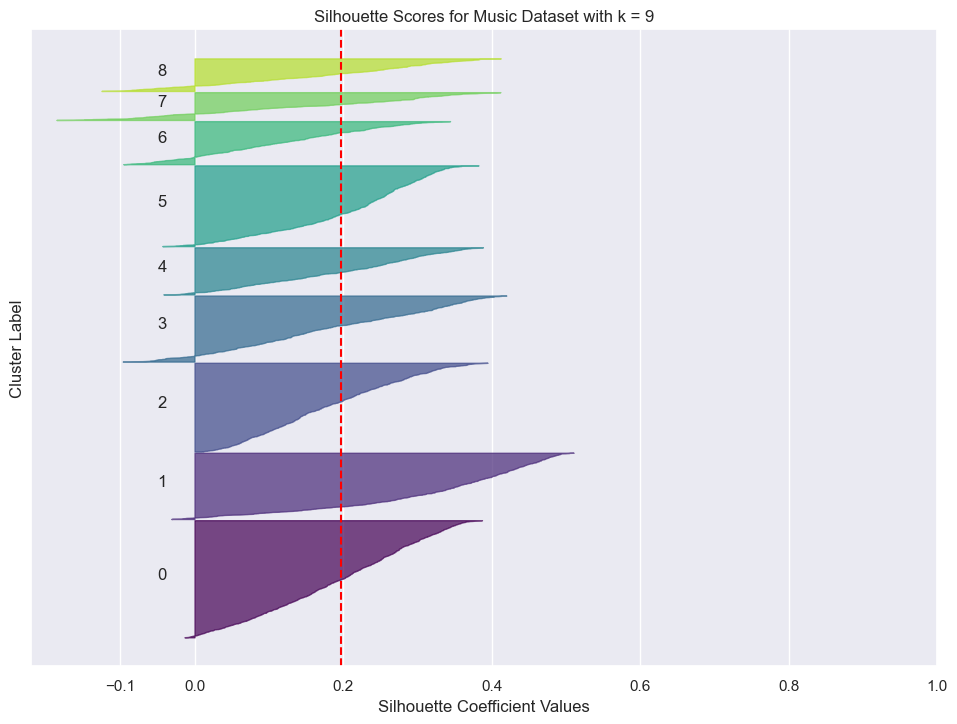

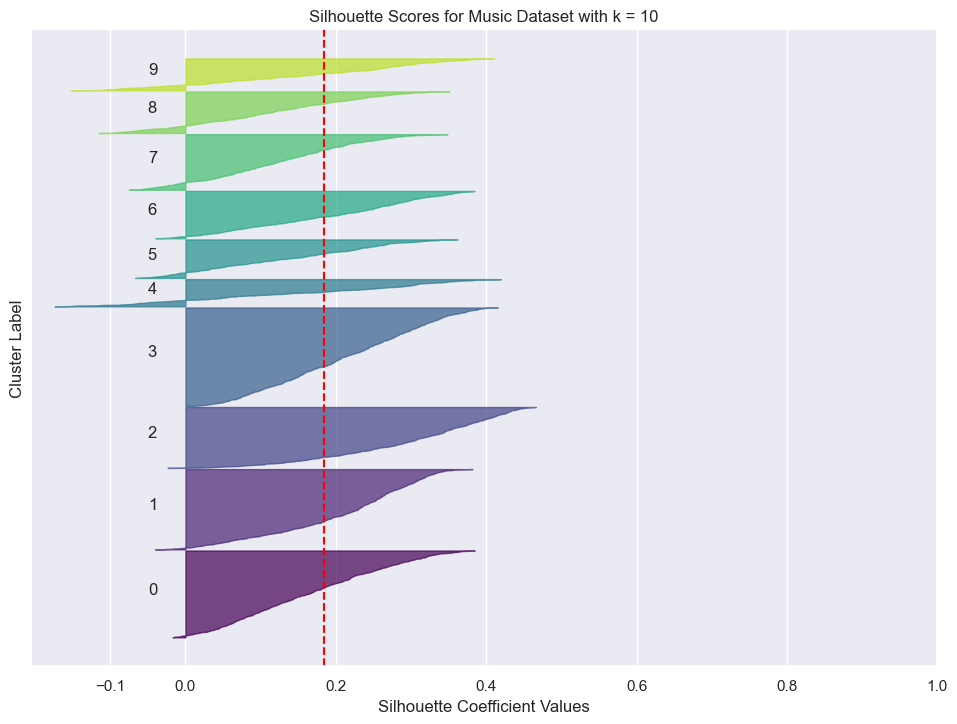

In [22]:
from sklearn.metrics import silhouette_samples
from matplotlib.cm import get_cmap
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features = musiclist_fit[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
scaled_features = scaler.fit_transform(features)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Define a function to calculate k-means clustering and return silhouette score for different k values
def get_silhouette_score(k, features):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(features)
    labels = kmeans.labels_
    score = silhouette_score(features, labels)
    return score

# Calculate silhouette scores for different k values
k_values = list(range(2, 11))
silhouette_scores = [get_silhouette_score(k, scaled_features) for k in k_values]

# Plot the silhouette scores
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Music Dataset")
plt.show()


def plot_silhouette_scores(k, features):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(features)
    labels = kmeans.labels_
    score = silhouette_score(features, labels)

    # Compute silhouette scores for each type of music
    sample_scores = silhouette_samples(features, labels)

    fig, ax = plt.subplots()
    y_lower = 10
    cmap = get_cmap("viridis")

    for i in range(k):
        # Aggregate the silhouette scores for samples belonging to the same cluster and sort them
        ith_cluster_silhouette_values = sample_scores[labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cmap(float(i) / k)
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for the next plot
        y_lower = y_upper + 10

    ax.set_title("Silhouette Scores for Music Dataset with k = {}".format(k))
    ax.set_xlabel("Silhouette Coefficient Values")
    ax.set_ylabel("Cluster Label")

    # The vertical line for the average silhouette score of all the values
    ax.axvline(x=score, color="red", linestyle="--")

    ax.set_yticks([])  # Clear the y-axis labels
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.show()

# Visualize the silhouette scores for different k values
for k in range(2, 11):
    plot_silhouette_scores(k, scaled_features)

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4, random_state=123)
pca_results = pca.fit_transform(features)

In [24]:
print(pca.explained_variance_ratio_.sum())
pca.explained_variance_ratio_.cumsum()

0.9998751500632385


array([0.95535929, 0.9996042 , 0.99979376, 0.99987515])

In [25]:
!pip install spotipy --upgrade
!pip install urllib3 --upgrade 

In [26]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy
import pandas as pd
from spotipy.oauth2 import SpotifyOAuth
import json
import spotipy.util as util


#client infos
sp = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(
    client_id="b8b739915c2143568daabbf8b65edfe0", 
    client_secret="65ddc5d8f52d4f85afd84e34b5bf23b2"))


In [27]:
results = sp.search(q='genre:"danceability"', type='track', limit=50)


In [28]:
results.keys()

dict_keys(['tracks'])

In [29]:
results["tracks"].keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [30]:
results["tracks"]["href"]

'https://api.spotify.com/v1/search?query=genre%3A%22danceability%22&type=track&offset=0&limit=50'

In [41]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth
import pandas as pd

client_id = 'b8b739915c2143568daabbf8b65edfe0'
client_secret = '65ddc5d8f52d4f85afd84e34b5bf23b2'
redirect_uri = 'http://localhost:8888/callback/'
scope = 'playlist-modify-public'

sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id=client_id, client_secret=client_secret, redirect_uri=redirect_uri, scope=scope))

for cluster_id in clusters['cluster_pred'].unique():

    cluster_songs = clusters[clusters['cluster_pred'] == cluster_id]

    playlist_name = f'Cluster {cluster_id} Playlist'
    playlist_description = f'playlist from cluster_x {cluster_id}'
    playlist = sp.user_playlist_create(user='*****', name=playlist_name, public=True, description=playlist_description)
    playlist_id = playlist['id']
    
    song_ids = cluster_songs['id']
    song_ids = [song_id.strip() for song_id in song_ids]
    track_uris = [f'spotify:track:{song_id}' for song_id in song_ids]
    
    # Split the track URIs into batches of 100
    batches = [track_uris[i:i+25] for i in range(0, len(track_uris), 100)]
    
    # Add tracks to the playlist in batches
    for batch in batches:
        sp.playlist_add_items(playlist_id=playlist_id, items=batch)
        print(f'Added {len(batch)} songs to {playlist_name}')

Added 25 songs to Cluster 6 Playlist
Added 25 songs to Cluster 6 Playlist
Added 25 songs to Cluster 6 Playlist
Added 25 songs to Cluster 6 Playlist
Added 11 songs to Cluster 6 Playlist
Added 25 songs to Cluster 3 Playlist
Added 25 songs to Cluster 3 Playlist
Added 25 songs to Cluster 3 Playlist
Added 25 songs to Cluster 3 Playlist
Added 25 songs to Cluster 3 Playlist
Added 25 songs to Cluster 3 Playlist
Added 25 songs to Cluster 3 Playlist
Added 25 songs to Cluster 3 Playlist
Added 25 songs to Cluster 3 Playlist
Added 25 songs to Cluster 3 Playlist
Added 25 songs to Cluster 3 Playlist
Added 25 songs to Cluster 3 Playlist
Added 25 songs to Cluster 7 Playlist
Added 25 songs to Cluster 7 Playlist
Added 25 songs to Cluster 7 Playlist
Added 25 songs to Cluster 7 Playlist
Added 25 songs to Cluster 7 Playlist
Added 25 songs to Cluster 7 Playlist
Added 25 songs to Cluster 2 Playlist
Added 25 songs to Cluster 2 Playlist
Added 25 songs to Cluster 2 Playlist
Added 25 songs to Cluster 2 Playlist
A